# Abalone_age_prediction

### Description

The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

### Objective:

Given is the attribute name, attribute type, the measurement unit and a brief description. 
The number of rings is the value to predict. 
You have to predict the rings of each abalone which will lead us to the age of that abalone. 

### Loading the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,roc_auc_score,roc_curve,recall_score,precision_score,f1_score


### Loading the CSV file

In [2]:
df_abalon=pd.read_csv("C:/Users/HP/anaconda3/DataScience/DataTrainedProjects/abalon.csv")

In [3]:
df_abalon.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
# listing datatypes of the features
df_abalon.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [5]:
# finding whether features have any null values
df_abalon.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
# describing the dataset
df_abalon.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Key_Insights

- By the analysis, we found that mean values are not as far from median but still we have skewness in some columns
- No missing values in the dataset
- All float data type except 'Sex' & 'Rings'
- Though features are not normaly distributed, are close to normality
- None of the features have minimum = 0 except Height 
- we dont have maximum values which are at the peak. most of the max values are nearer to 1 other than whole weight & Target values

In [7]:
# we will calculate the external feature which as to be found using number of Rings
df_abalon["age"] = df_abalon["Rings"] + 1.5

In [8]:
# we will find the value counts of each of the features
df_abalon['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [9]:
# we will find the shape of the dataset
df_abalon.shape

(4177, 10)

In [10]:
# we will find the info on Constraints
df_abalon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
 9   age             4177 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 326.5+ KB


In [11]:
df_abalon

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


### Univariate Analysis

<AxesSubplot:xlabel='Sex', ylabel='count'>

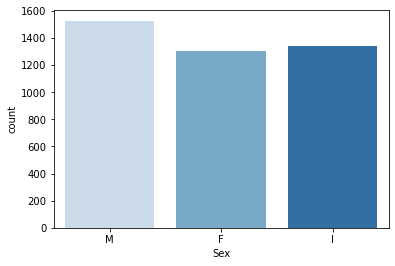

In [12]:
# we will find the count of the feature Sex
sns.countplot(x=df_abalon['Sex'],data=df_abalon,palette="Blues")

we have 1500 Males,1250 Females,1300 Infants abalone species

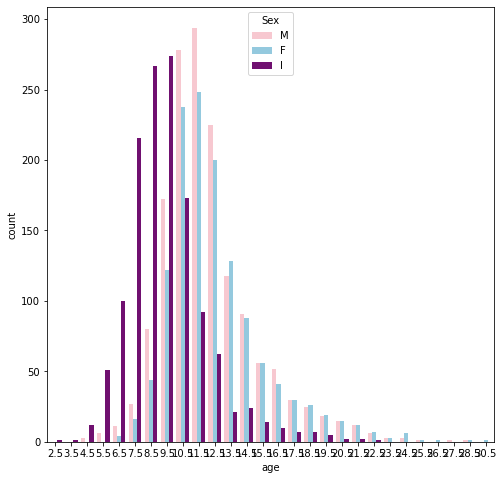

In [13]:
# we will find the count of Age feature
plt.figure(figsize=(8,8))
sn= sns.countplot(x=df_abalon['age'],data=df_abalon,hue=df_abalon['Sex'],palette=['pink','skyblue','purple'])

In [14]:
# we will find the skewness of the features
df_abalon.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
age               1.114102
dtype: float64

### Bivariate Analysis

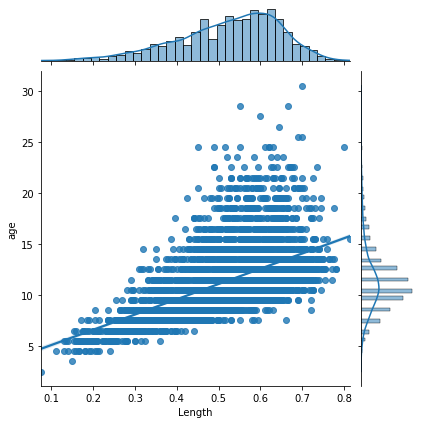

In [15]:
sns.jointplot(x = "Length", y = "age", data=df_abalon, kind="reg")
plt.show()

Above joint plot suggest that there is left skewness in the Length feature and age is normally distributed. 
Also the relationship between Length & age is Positive but scattered all around suggesting as the age increases Length also increases

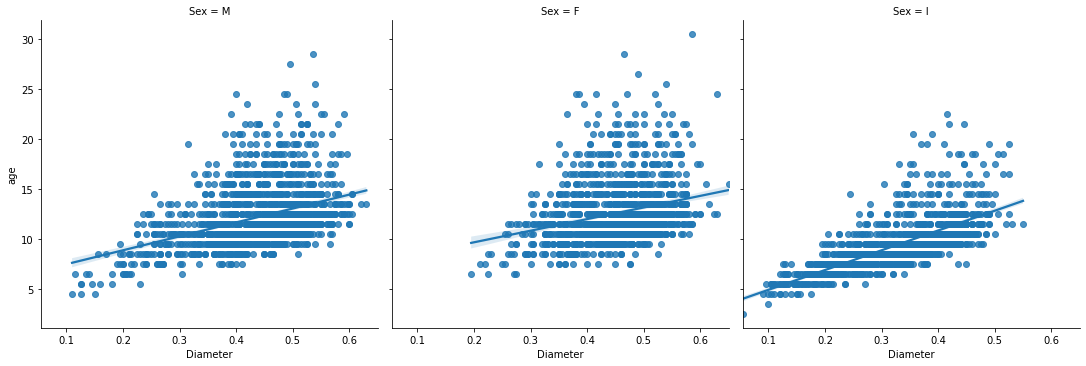

In [16]:
sns.lmplot(x='Diameter',y='age',data=df_abalon,col='Sex',palette = "cool")

for all of the abalone Sex the relationship is linear & positive. But for Infant the datapoints are very closely related.

### Encoding Categorical Variables

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=['Sex']
df_abalon[cols] = df_abalon[cols].apply(le.fit_transform)


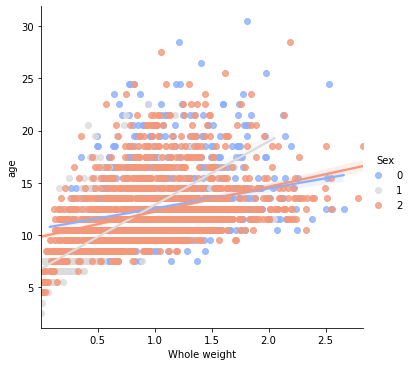

In [18]:
sns.lmplot(x='Whole weight',y='age',data=df_abalon ,hue = "Sex",palette = "coolwarm")

### Removing Skewness

In [19]:
from sklearn.preprocessing import power_transform
x=df_abalon.drop('Rings',axis=1)

x=power_transform(x,method='yeo-johnson')

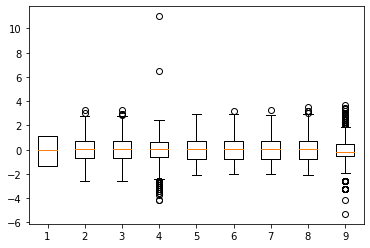

In [20]:
# we will find the outliers present in the dataset using boxplot
plt.boxplot(x)
plt.show()

we have the outliers in many of the features found using boxplot

In [21]:
#removing outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
z

array([[1.12707158, 0.68550213, 0.54986033, ..., 0.69328289, 0.587809  ,
        1.48312508],
       [1.12707158, 1.39634403, 1.38733299, ..., 1.33295268, 1.33241968,
        0.95394878],
       [1.30793479, 0.07077438, 0.00853714, ..., 0.25513514, 0.09826193,
        0.17468128],
       ...,
       [1.12707158, 0.59336612, 0.64519089, ..., 1.01560749, 0.59839786,
        0.17468128],
       [1.30793479, 0.85337516, 0.76992788, ..., 0.81518436, 0.51914542,
        0.16047586],
       [1.12707158, 1.83447784, 1.72628889, ..., 1.61134422, 1.65848824,
        0.74974792]])

In [22]:
print(np.where(z>3))


(array([ 163,  166,  236,  236,  237,  237,  238,  238,  294,  306,  306,
        480,  520,  526,  694,  719,  719,  720,  720,  891,  894, 1054,
       1174, 1209, 1257, 1417, 1428, 1428, 1429, 1763, 1987, 2051, 2108,
       2108, 2115, 2161, 2169, 2171, 2172, 2201, 2209, 2334, 2371, 2381,
       2711, 2711, 3149, 3190, 3280, 3472, 3521, 3801, 3902, 3996],
      dtype=int64), array([7, 7, 3, 8, 3, 8, 3, 8, 8, 3, 8, 8, 8, 8, 3, 3, 8, 3, 8, 7, 8, 8,
       3, 5, 3, 3, 1, 2, 8, 6, 3, 3, 7, 8, 8, 7, 3, 3, 3, 8, 8, 1, 8, 3,
       3, 8, 8, 3, 8, 8, 8, 8, 3, 3], dtype=int64))


In [23]:
x=x[(z<3).all(axis=1)]

In [24]:
y=df_abalon['Rings']

### Multivariate Analysis

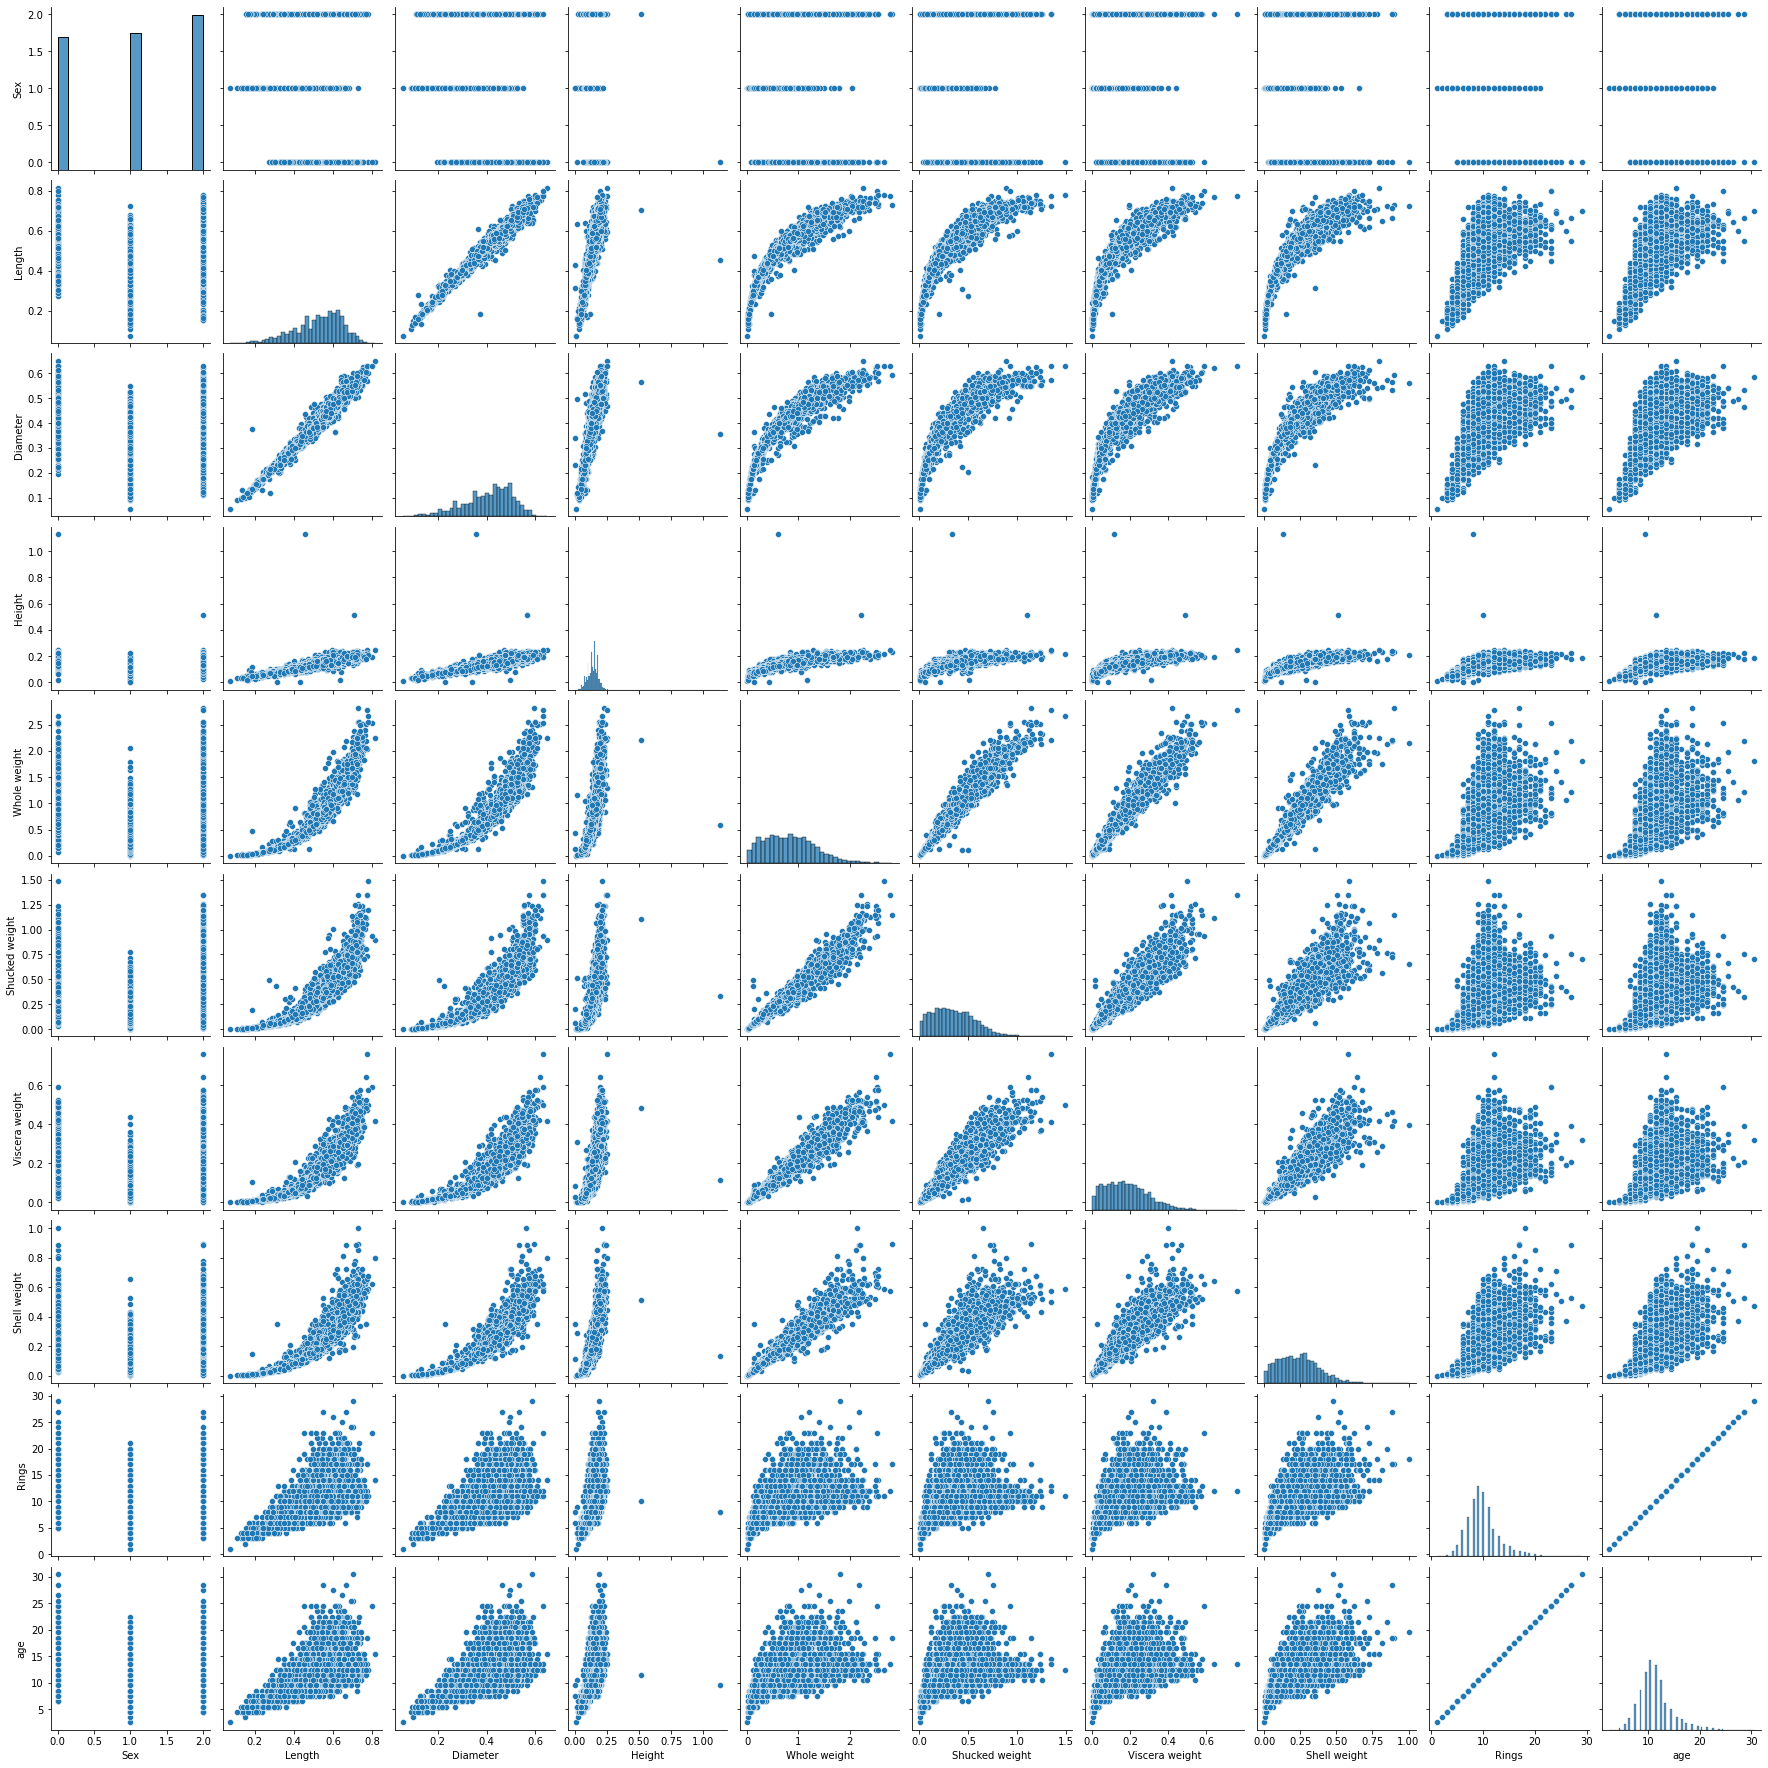

In [26]:
sns.pairplot(df_abalon,palette='xkcd:greyish blue')

most datapoints are evenly distributed against the target variables in the scatterplot suggesting fine corelation between the independent & dependent variable

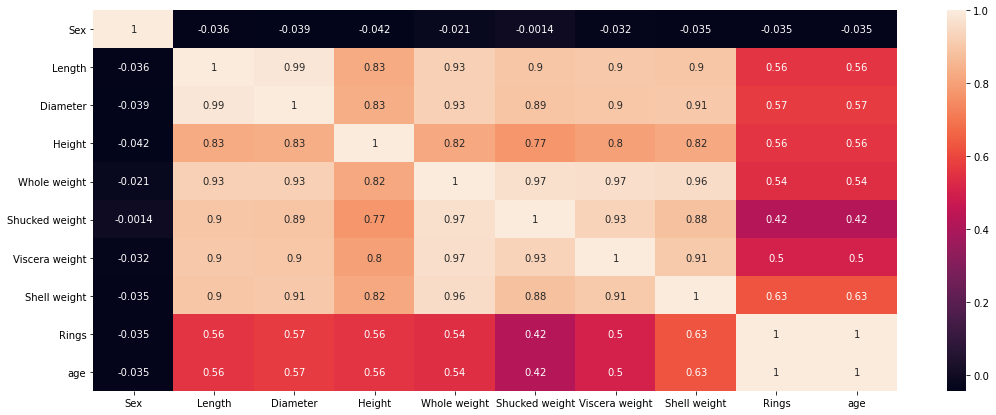

In [27]:
plt.figure(figsize=[18,7])
sns.heatmap(df_abalon.corr(),annot=True)
plt.show()

Sex is negetively corelated to most of the feature so we can drop that column

In [28]:
x=df_abalon.drop(['Rings','Sex'],axis=1)

In [29]:
y=df_abalon['Rings']

In [30]:
x.shape

(4177, 8)

### Splitting dataset into training and test dataset

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Data Modelling

In [32]:
lm=LinearRegression()
lm.fit(x_train,y_train)
pred_lm=lm.predict(x_test)
pred_lm=pred_lm.astype(int)
pred_lm
print("Test score "+str(lm.score(x_test, y_test)))
print("Train score "+str(lm.score(x_train, y_train)))

Test score 1.0
Train score 1.0


we have score of the model as 100 which represent that the model is not at all perfect. So we will work on other models as well to find more accuracy

In [33]:
lm.coef_

array([ 3.10166957e-14, -2.34023067e-14,  9.02465504e-16, -5.90935133e-16,
       -6.43165158e-16,  5.27892622e-16,  4.32367828e-16,  1.00000000e+00])

In [34]:
lm.intercept_

-1.5000000000000018

In [35]:
# we will find the Predicted vs Actual predicted values
print("Predicted Rings:",pred_lm)
print("Actual Rings:",y_test)

Predicted Rings: [ 9  8 15  9 13 11  7  6  7 10 21  7 14  8  8 17 11 13 13  9 20 12 12 11
 10  7 10  8  9 10  9 10  6 10  8  9  4  2  6  5 12 12 18  8 11 13 10 10
 17  3  5 21  8  4  7  9 14 20 10  8 10 13 11  7  9 11  3  5  7  9 10 10
  9  7  8 12 22 13 14  9 14 12 10  6  7 12  9  9 18 10 10  9 11 11 10 10
  6 14  7  6 14 11 11 12  7  8 10  8  9 13 17  8 12  9 11  4  9 11 11 13
 11 10  8 13  8 19  9  9  9 10  9  9 10  4  7  8 10 10  4 12  8 10  7  8
 10 14 10 13 10 10  9  8 11 10  8 11 11  6  8  6  9  5 10 12  7 10 17 11
  8  8 10 12  9  8  8  7  9 10  9 10 12  7  8  8  7 10  8 11  9  4  9  8
 15 12 11 16 10 11 12  9  8 17 10 11  8 11 11  9  8 10  4  9 12  5  8 10
 11  7  9 12 12  8 12 11  9  7  7 12  9 11  4 10 10 11  6 10  9  6  4 10
  8 11 10  8 10  8  9  7  7  6  7  9  9  7 14 10  9  4 11 13 19 15  9  9
  7  5  6 13 11  6  9  8  6 12  8 18 10 15  9  5 14  8 12  8  4  9 10  4
 10 10 11  3 14  8 14  8  4 14  7 11 10 10  7 10  9  9 18  7  5  4  8  6
  7 13 12 10  4 22  9  9 11  7  7 

In [36]:
print("Accuracy score is: ",accuracy_score(pred_lm,y_test))

Accuracy score is:  0.6435406698564593


As we can see that the accuracy score is 0.64 which is much more less than 1. so we will work on other models as well

In [37]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lm.fit(x_train,y_train)
    pred_train=lm.predict(x_train)
    pred_test=lm.predict(x_test)
    print(f"At random state {i},the training accuracy is:- {r2_score(y_train,pred_train)}")
    print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print("\n")

At random state 0,the training accuracy is:- 1.0
At random state 0,the testing accuracy is:- 1.0


At random state 1,the training accuracy is:- 1.0
At random state 1,the testing accuracy is:- 1.0


At random state 2,the training accuracy is:- 1.0
At random state 2,the testing accuracy is:- 1.0


At random state 3,the training accuracy is:- 1.0
At random state 3,the testing accuracy is:- 1.0


At random state 4,the training accuracy is:- 1.0
At random state 4,the testing accuracy is:- 1.0


At random state 5,the training accuracy is:- 1.0
At random state 5,the testing accuracy is:- 1.0


At random state 6,the training accuracy is:- 1.0
At random state 6,the testing accuracy is:- 1.0


At random state 7,the training accuracy is:- 1.0
At random state 7,the testing accuracy is:- 1.0


At random state 8,the training accuracy is:- 1.0
At random state 8,the testing accuracy is:- 1.0


At random state 9,the training accuracy is:- 1.0
At random state 9,the testing accuracy is:- 1.0


At random 

At random state 96,the training accuracy is:- 1.0
At random state 96,the testing accuracy is:- 1.0


At random state 97,the training accuracy is:- 1.0
At random state 97,the testing accuracy is:- 1.0


At random state 98,the training accuracy is:- 1.0
At random state 98,the testing accuracy is:- 1.0


At random state 99,the training accuracy is:- 1.0
At random state 99,the testing accuracy is:- 1.0




at all the random state, we have the corresponding values which looks same of about 1

###### finding Cross_validationScore,r2_score

In [38]:
Train_accuracy=r2_score(y_train,pred_train)
Test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lm,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")
    print("\n")

At cross fold 2 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 3 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 4 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 5 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 6 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 7 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 8 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0


At cross fold 9 the cv score is 1.0 and accuracy score for training is 1.0 and accuracy for the testing is 1.0




we are getting cv score of 1 at all K-fold which is the constant across all K-folds.so we will consider this.

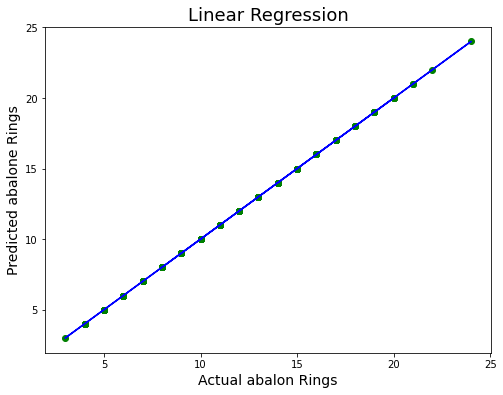

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_test, color='g')
plt.plot(y_test,y_test, color='b')
plt.xlabel('Actual abalon Rings',fontsize=14)
plt.ylabel('Predicted abalone Rings',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

As the actaul abalon rings co-inside with the predicted ones we will find positive relamtionship with between each other

###### Applying support vector machine Regressor

In [40]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=100, gamma=1, epsilon=0.01).fit(x_train, y_train)
svr_lin = SVR(kernel='linear', C=100, gamma='auto').fit(x_train, y_train)
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1).fit(x_train, y_train)

print("Test score for rbf :",str(svr_rbf.score(x_test, y_test)))
print("Test score for lin :",str(svr_rbf.score(x_test, y_test)))
print("Test score for poly :",str(svr_rbf.score(x_test, y_test)))
predict_rbf=svr_rbf.predict(x_test)

Test score for rbf : 0.9989497668323319
Test score for lin : 0.9989497668323319
Test score for poly : 0.9989497668323319


In [41]:
predict_rbf=predict_rbf.astype(int)
print("Accuracy is :",accuracy_score(predict_rbf,y_test))

Accuracy is : 0.25239234449760767


we can see that even though the test score is high for rbf model accuracy score is less. so we will not consider the model

### Applying Decision Tree Regressor

Accuracy score:  1.0


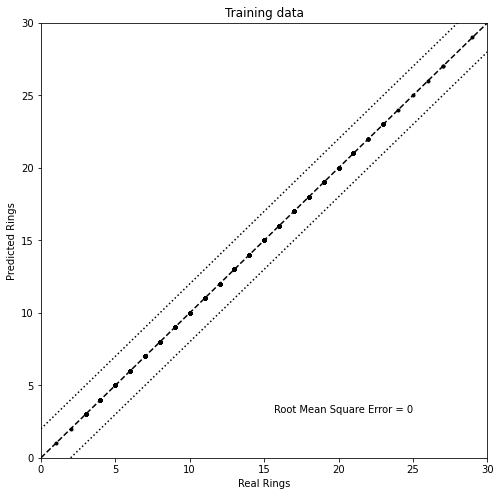

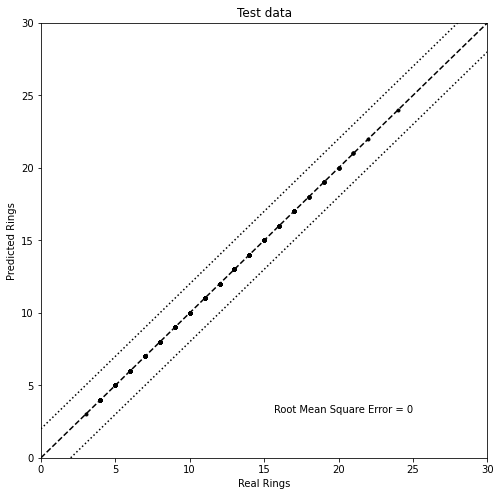

In [42]:
from sklearn.tree import DecisionTreeRegressor
# create an estimator, optionally specifying parameters
m = DecisionTreeRegressor()
# fit the estimator to the data
m.fit(x_train,y_train)
# apply the model to the test and training data
predicted_test_y = m.predict(x_test)
predicted_train_y = m.predict(x_train)
pred_dtr=predicted_test_y.astype(int)
print("Accuracy score: ",accuracy_score(y_test,predicted_test_y))
def scatter_y(y_test, predicted_y):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(y_test, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (y_test - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('Real Rings')
    ax.set_ylabel('Predicted Rings')
    
    return rms
scatter_y(y_train, predicted_train_y)
plt.title("Training data")
scatter_y(y_test, predicted_test_y)
plt.title("Test data");

Accuracy score is:  1.0


Text(0.5, 1.0, 'Test data')

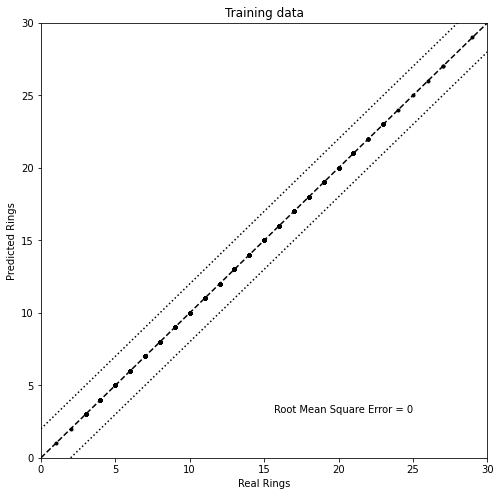

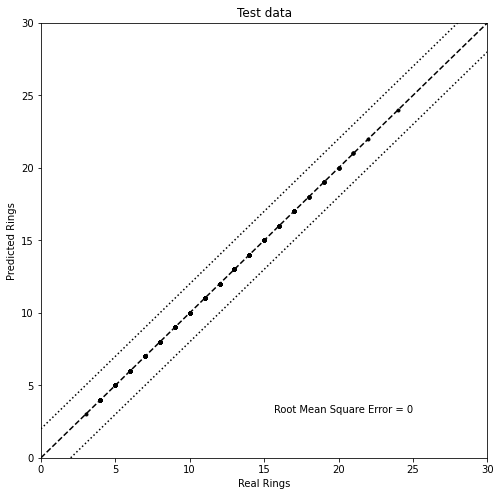

In [43]:
model = DecisionTreeRegressor(max_depth=10)
# fit the estimator to the data
model.fit(x_train,y_train)
# apply the model to the test and train data
predicted_test_y = model.predict(x_test)
predicted_train_y = model.predict(x_train)
print("Accuracy score is: ",accuracy_score(predicted_test_y,y_test))
scatter_y(y_train, predicted_train_y)
plt.title("Training data")
rms_decision_tree = scatter_y(y_test, predicted_test_y)
plt.title("Test data")

###### Applying Random forest regressor

Accuracy score of testing set:  0.9988038277511961


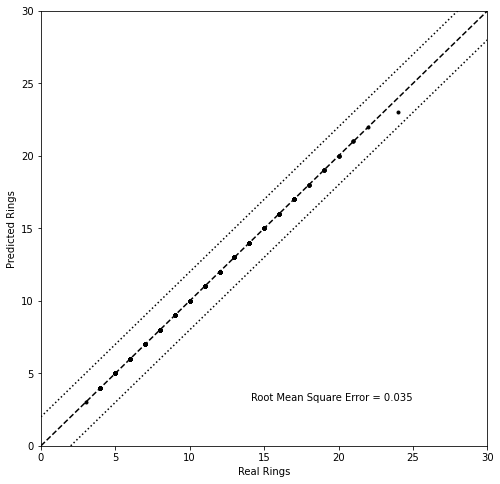

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)
model.fit(x_train, y_train)
predicted_test_y = model.predict(x_test)
predicted_test_y=predicted_test_y.astype(int)
rms_random_forest = scatter_y(y_test, predicted_test_y)
print("Accuracy score of testing set: ",accuracy_score(y_test,predicted_test_y))

In [45]:
df_abalon["age"].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
3.5       1
26.5      1
27.5      1
30.5      1
2.5       1
Name: age, dtype: int64

In [46]:
# categorizing the Age variable
df_abalon_new = df_abalon.copy()
Age = []
for i in df_abalon_new["age"]:
    if i < 9:
        Age.append("1")
    if i > 9 and i< 18 :
        Age.append("2")
    if i > 18:
        Age.append("3")
df_abalon_new["Age"] = Age
df_abalon_new.drop("age" , axis =1,inplace=True)
df_abalon_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,1
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


In [47]:
x1=df_abalon_new.iloc[:,:-1]
y1=df_abalon_new['Age']

### Splitting test & train set

In [48]:
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

### Scaling the Dataset

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)

array([[-1.26895683, -0.00954585,  0.20680221, ..., -0.02098237,
        -0.42540763, -0.30383887],
       [-0.05799999, -0.80318028, -0.85404855, ..., -0.91375895,
        -0.96974532, -0.92144737],
       [ 1.15295686, -0.59432912, -0.60146504, ..., -0.78098705,
        -0.68512431,  0.31376963],
       ...,
       [ 1.15295686, -0.13485655, -0.14681471, ..., -0.44676812,
        -0.37915672,  0.31376963],
       [ 1.15295686,  0.40815649,  0.56041914, ...,  0.33154992,
        -0.04472703, -0.30383887],
       [-1.26895683,  0.57523742,  0.66145254, ...,  0.44600846,
         0.21143188, -1.23025162]])

###### Applying Logistic Regression to predict the Age of the Abalone species

In [50]:
lr = LogisticRegression(random_state=0).fit(X_train, Y_train)
y_pred = lr.predict(X_test)
print("Test score "+str(lr.score(X_test, Y_test)))
print("Train score "+str(lr.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(Y_test, y_pred))
confusion_matrix(Y_test,y_pred)

Test score 1.0
Train score 1.0
Classification report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       927
           3       1.00      1.00      1.00        54

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



array([[273,   0,   0],
       [  0, 927,   0],
       [  0,   0,  54]], dtype=int64)

###### Applying K-Nearest Neighbour classifier

Test score 1.0
Train score 1.0
Classification report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       927
           3       1.00      1.00      1.00        54

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



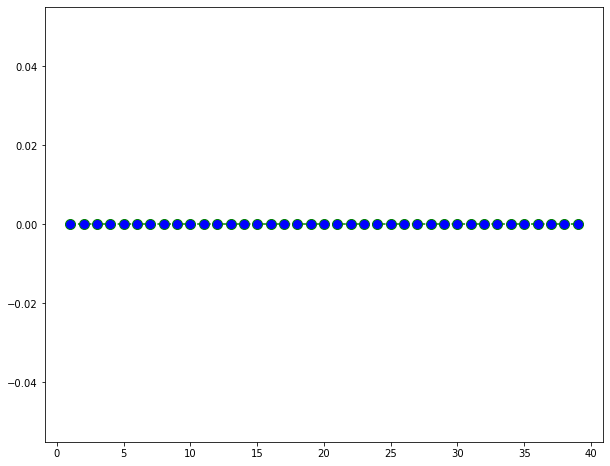

In [51]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=3)
n.fit(X_train, Y_train)
predict_knn = n.predict(X_test)
print("Test score "+str(n.score(X_test, Y_test)))
print("Train score "+str(n.score(X_train, Y_train)))
print("Classification report :")
print(classification_report(Y_test,predict_knn))

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train, Y_train)
    pred_knn = knn.predict(X_test)
    error_rate.append(np.mean(Y_test != pred_knn))
    
plt.figure(figsize = (10,8))
plt.plot(range(1,40), error_rate, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.show()

As we can see from the above graph we have zero error rate

###### Applying DecisionTreeClassifier

In [52]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, Y_train)
pred_dtc = dtc.predict(X_test)
print("Test score "+str(dtc.score(X_test, Y_test)))
print("Train score "+str(dtc.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(Y_test, pred_dtc))

Test score 1.0
Train score 1.0
Classification report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       927
           3       1.00      1.00      1.00        54

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254



### Hyper parameter tuning

In [53]:
from sklearn.model_selection import GridSearchCV
rnd = RandomForestClassifier()
parameters = {'criterion':['gini', 'entropy'],'max_features':["auto", "sqrt", "log2"],'n_estimators':[100,150,200],'random_state':[30,42,0]}
clf = GridSearchCV(rnd,parameters)
clf.fit(X_train,Y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100, 'random_state': 30}


###### Applying RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(criterion='gini',max_features="sqrt",n_estimators=100, random_state=30)
rd.fit(X_train, Y_train)
pred_rnd = rd.predict(X_test)
print("Test score "+str(rd.score(X_test, Y_test)))
print("Train score "+str(rd.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print("Classification report :")
print(classification_report(Y_test, pred_rnd))

rnd_score = cross_val_score(rd,X_train,Y_train,cv=2)
rnd_mean = rnd_score.mean()
print('Cross Val Score:',rnd_mean*100)


Test score 1.0
Train score 1.0
Classification report :
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       273
           2       1.00      1.00      1.00       927
           3       1.00      1.00      1.00        54

    accuracy                           1.00      1254
   macro avg       1.00      1.00      1.00      1254
weighted avg       1.00      1.00      1.00      1254

Cross Val Score: 99.96580027359781


### Conclusion: 

Since Random forest classifier is giving desirable predicted scores for accuracy & Cross validation,we will consider the same model

In [55]:
import pickle
filename = 'Abalone.pkl'
pickle.dump(rd, open(filename, 'wb'))

In [56]:
loaded_model = pickle.load(open('Abalone.pkl', 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

1.0


In [57]:
conclusion=pd.DataFrame([loaded_model.predict(X_test)[:],Y_test[:]],index=["Predicted","Original"])

In [58]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253
Predicted,2,2,2,2,2,2,1,1,1,2,...,2,1,1,2,2,2,1,1,2,2
Original,2,2,2,2,2,2,1,1,1,2,...,2,1,1,2,2,2,1,1,2,2
